## Creating normal random variables

The `np.random.normal()`  function generates a vector of random normal variables.

In [10]:
import numpy as np 

x = np.random.normal(size=50)
y = x + np.random.normal(loc = 50 , scale = 1 , size = 50)
y
np.corrcoef(x, y)

array([[1.        , 0.79329987],
       [0.79329987, 1.        ]])

Give random seed to ensure the random generator is giving same output at all times for analysis , we use `np.random.default_rng()`
We can then use normal function on range object with given seed

In [14]:
rng = np.random.default_rng(100)
x = rng.normal(loc = 50, scale = 1 , size = 50)
y = rng.normal(loc = 52 , scale = 1 , size = 50)
# this code gives constant output at all times

## Graphics

In matplotlib, a plot consists of a figure and one or more axes. You can think of the figure as the blank canvas upon which one or more plots will be displayed: it is the entire plotting window.  

Axe is the actual information that is passed for a plot

subplots() function from matplotlib , returns a tuple of length two: a figure object as well as the relevant axes object. We will typically pass figsize as a keyword argument. Having created our axes, we attempt our first plot using its plot() method. 

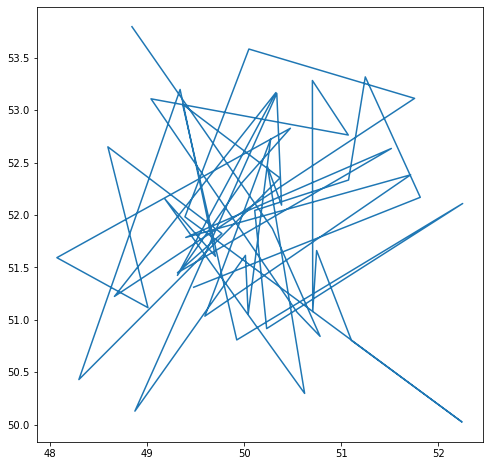

In [16]:
from matplotlib.pyplot import subplots

fig , axe = subplots(figsize = (8,8))
axe.plot(x,y)

## Different kinds of plots 
### Scatter

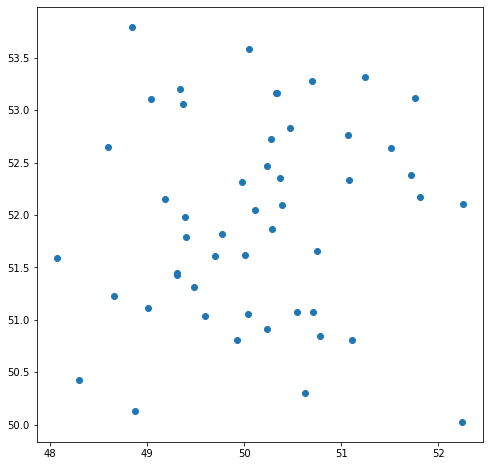

In [21]:
fig, axe = subplots(figsize=(8, 8))
axe.plot(x,y,"o")

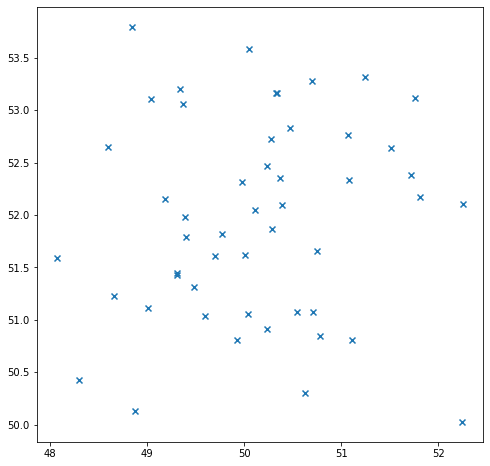

In [27]:
fig , axe = subplots(figsize=(8,8))
axe.scatter(x,y,marker = "x")

### Set x and y lables with titles

we make use of the set_xlabel(), set_ylabel(), and set_title() methods of ax.

Text(0.5, 1.0, 'Plot of X and Y')

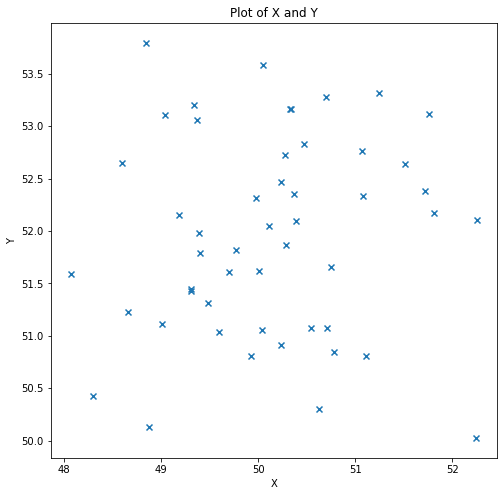

In [30]:
fig , ax = subplots(figsize = (8,8))
ax.scatter(x,y,marker ="x")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Plot of X and Y")

### resizing charts
the purpose of having `fig` object accessible is to change the display window settings

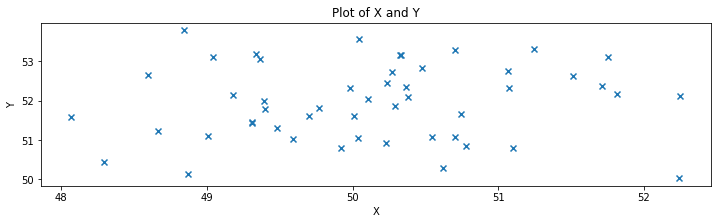

In [31]:
fig.set_size_inches(12,3)
fig
# this fig is already attached to the axe object that contains alls the plot information b

### Multiple charts in a figure

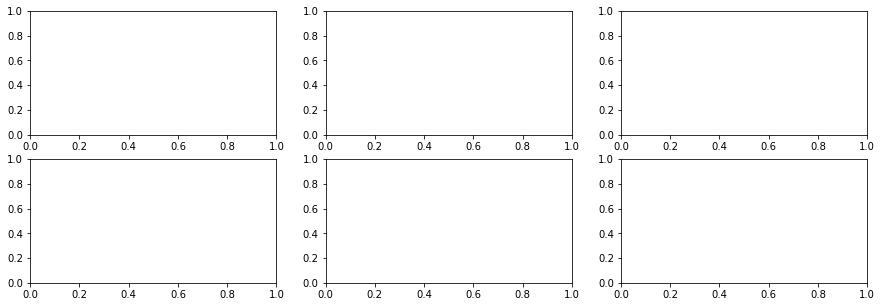

In [34]:
fig ,ax = subplots(nrows = 2 , ncols = 3 , figsize = (15,5))

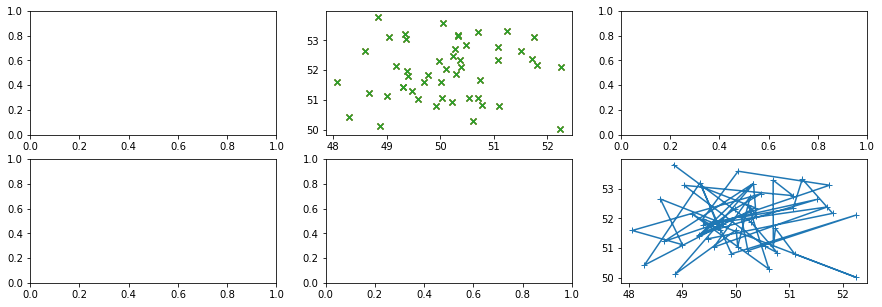

In [37]:
ax[0,1].scatter(x,y,marker="x")
ax[1,2].plot(x,y,marker="+")
fig

### Contour Plot for 3 dimensional data

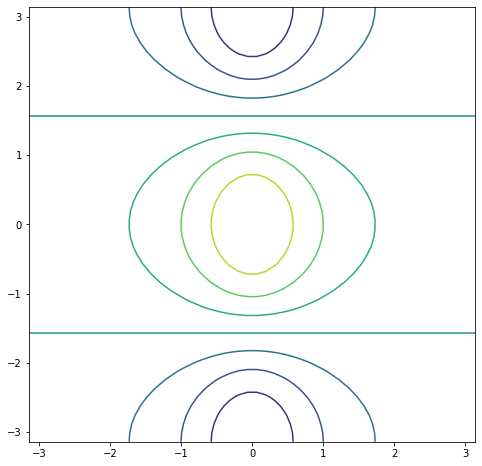

In [40]:
fig, ax = subplots(figsize=(8,8))
x = np.linspace(-np.pi,np.pi,50)
y = x
f = np.multiply.outer(np.cos(y),1/(1+x**2))
ax.contour(x,y,f)

### Heatmaps and increased levels of contour map

np.contour(x,y,f,levels= 45)
and ax.imshow()

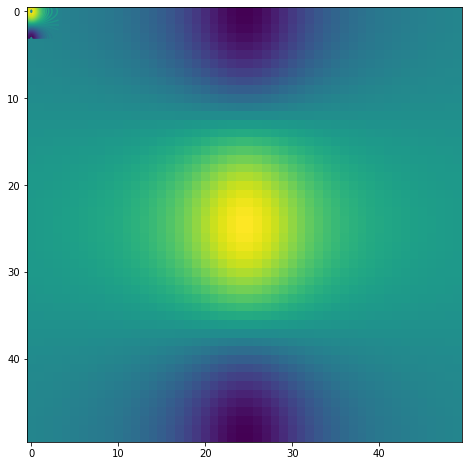

In [44]:
fig, ax = subplots(figsize=(8, 8))
ax.contour(x, y, f, levels=45)
ax.imshow(f)

## Slicing and indexing

In [48]:
A = np.array(np.arange(16).reshape(4,4))
A

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [50]:
A[:,[0,2]]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10],
       [12, 14]])

In [55]:
A[[0,2]]

array([[ 0,  1,  2,  3],
       [ 8,  9, 10, 11]])

In [56]:
A[[1,3],[0,2]]
# very ODD result

array([ 4, 14])

Reason for above result  is that When supplied with two indexing lists, the numpy interpretation is that these provide pairs of 𝑖,𝑗 indices for a series of entries. That is why the pair of lists must have the same length

To find the submatrix of second and last rows with first and third column filitered out , we use below method -> get the row indices out in a single operations , operate on that matrix with column filtering through this  method  [:,[x,y]] 

In [61]:
A[[1,3]][:,[0,2]]

array([[ 4,  6],
       [12, 14]])

### use `np.ix_` function to extract basis simple i,j notation of matrix

In [64]:
idx = np.ix_([1,3],[0,2,3])
A[idx]

array([[ 4,  6,  7],
       [12, 14, 15]])

In [65]:
A[1:4:2,0:3:2]

array([[ 4,  6],
       [12, 14]])

In [66]:
A[1,2]

6

### Boolean indexing

In [73]:
keep_rows = np.zeros(A.shape[0],bool)
keep_rows[1:4:2] = True
keep_rows

# same as np.array([0,1,0,1])
np.all(keep_rows == np.array([0,1,0,1]))

True

even though `np.array([0,1,0,1])`  and `keep_rows` are equal according to `==`, they index different sets of rows!
The former retrieves the first, second, first, and second rows of `A`.

In [76]:
A[np.array([0,1,0,1])]

# this is a generating function of seclection function

array([[0, 1, 2, 3],
       [4, 5, 6, 7],
       [0, 1, 2, 3],
       [4, 5, 6, 7]])

In [77]:
A[keep_rows]

# this is a selection only function - slice alone

array([[ 4,  5,  6,  7],
       [12, 13, 14, 15]])

`np.ix_()` function to create a mesh containing the second and fourth rows, and the first,  third, and fourth columns. This time, we apply the function to Booleans, rather than lists.

In [78]:
keep_cols = np.zeros(A.shape[1], bool)
keep_cols[[0, 2, 3]] = True
idx_bool = np.ix_(keep_rows, keep_cols)
A[idx_bool]

array([[ 4,  6,  7],
       [12, 14, 15]])

## Loading Data

 The `pandas` library can be used to create and work with data frame objects.
 
 If the file is in the same location as this notebook file, then we are all set. 
Otherwise, the command `os.chdir()`  can be used to *change directory*. (You will need to call `import os` before calling `os.chdir()`.)

In [95]:
import pandas as pd
Auto = pd.read_csv('.\data\Auto.csv',na_values=['?'])
Auto = Auto.dropna()
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [108]:
Auto[Auto['year'] > 80].shape

# find mpg values where years > 80
Auto[Auto['year'] > 80][['mpg','year']].shape

(58, 2)

Use `set_index()` to index the database using values of input column to this function

In [109]:
Auto_re = Auto.set_index('name')
Auto_re

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1
vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1


Access data entries using `loc[]` function basis index column of table or `iloc[]` using index of row

In [113]:
#belwo to extract row with given index 
Auto_re.loc["ford torino"]

# below to extract row wise entry of table
Auto_re.iloc[[3,4]]

# below to extract the columns of table
Auto_re.iloc[:,[0,2,3]]

,mpg,displacement,horsepower
name,,,
chevrolet chevelle malibu,18.0,307.0,130.0
buick skylark 320,15.0,350.0,165.0
plymouth satellite,18.0,318.0,150.0
amc rebel sst,16.0,304.0,150.0
ford torino,17.0,302.0,140.0
...,...,...,...
ford mustang gl,27.0,140.0,86.0
vw pickup,44.0,97.0,52.0
dodge rampage,32.0,135.0,84.0


In [118]:
idx = Auto_re["year"]>80

# select col values given condition on another column
Auto_re.loc[Auto_re["year"]>80,["mpg","cylinders","year"]]

,mpg,cylinders,year
name,,,
plymouth reliant,27.2,4,81
buick skylark,26.6,4,81
dodge aries wagon (sw),25.8,4,81
chevrolet citation,23.5,6,81
plymouth reliant,30.0,4,81
toyota starlet,39.1,4,81
plymouth champ,39.0,4,81
honda civic 1300,35.1,4,81
subaru,32.3,4,81


### using a `lambda`, 
suppose that we want all cars built after 1980 that achieve greater than 30 miles per gallon:

In [121]:
Auto_re.loc[lambda x : (x["year"]>80) & (x["mpg"]>30) , ["weight","origin","year","mpg"]]

,weight,origin,year,mpg
name,,,,
toyota starlet,1755,3,81,39.1
plymouth champ,1875,1,81,39.0
honda civic 1300,1760,3,81,35.1
subaru,2065,3,81,32.3
datsun 210 mpg,1975,3,81,37.0
toyota tercel,2050,3,81,37.7
mazda glc 4,1985,3,81,34.1
plymouth horizon 4,2215,1,81,34.7
ford escort 4w,2045,1,81,34.4


we may want to loop over the columns of a data frame and
print the percent missing in each column.
Let’s create a data frame `D` with columns in which 20% of the entries are missing i.e. set
to `np.nan`.  We’ll create the
values in `D` from a normal distribution with mean 0 and variance 1 using `rng.standard_normal()`
and then overwrite some random entries using `rng.choice()`.

In [136]:
rng = np.random.default_rng(1)
A = rng.standard_normal((127,2))
M = rng.choice([0,np.nan],p=(0.8,0.2),size = A.shape)
A += M
D = pd.DataFrame(A,columns=["foo","bar"])
D

for cols in D:
    temp = "Col {0} has {1:.2%} missing values"
    print(temp.format(cols,np.isnan(D[cols]).mean()))

Col foo has 18.90% missing values
Col bar has 21.26% missing values


## Additional plots

Text(0, 0.5, 'mpg')

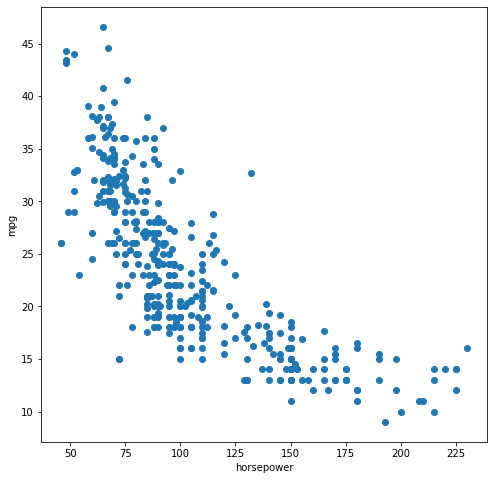

In [138]:
fig, ax = subplots(figsize=(8, 8))
ax.plot(Auto['horsepower'], Auto['mpg'], 'o')
ax.set_xlabel("horsepower")
ax.set_ylabel("mpg")

### Auto.boxplot , scatterplot , hist()

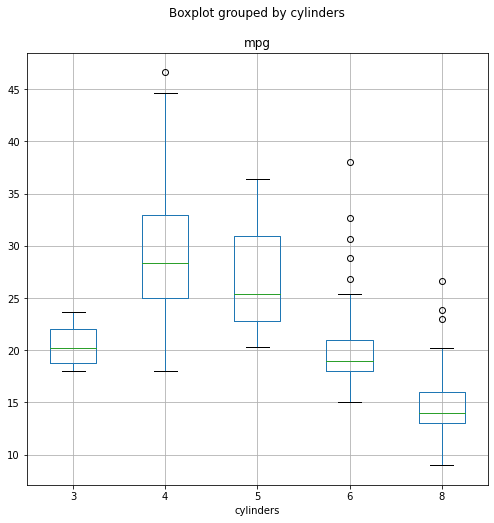

In [139]:
fig, ax = subplots(figsize=(8, 8))
Auto.boxplot('mpg', by='cylinders', ax=ax);

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

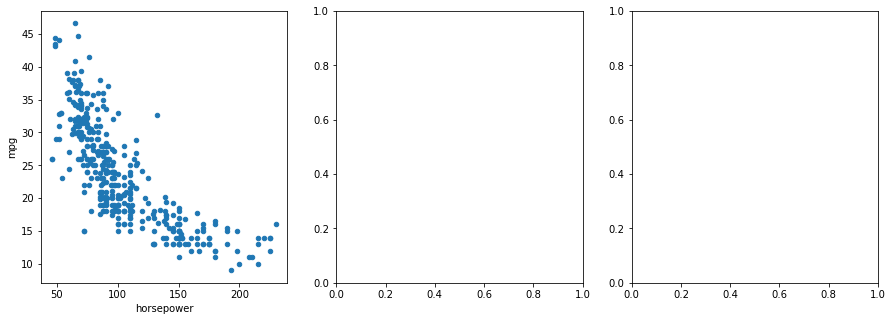

In [142]:
fig, axes = subplots(ncols=3, figsize=(15, 5))
Auto.plot.scatter('horsepower', 'mpg', ax=axes[0])

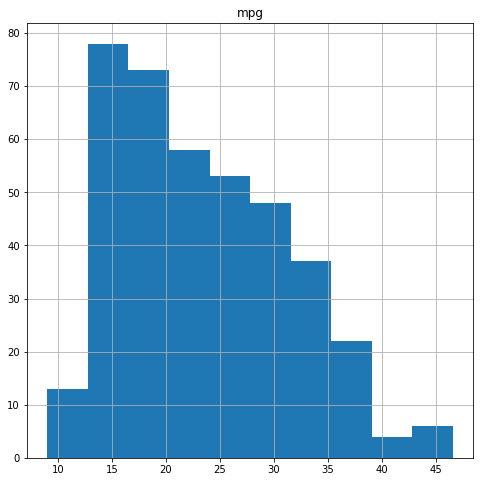

In [143]:
fig, ax = subplots(figsize=(8, 8))
Auto.hist('mpg', ax=ax);

We can use the pd.plotting.scatter_matrix() function to create a scatterplot matrix to visualize all of the pairwise relationships between the columns in a data frame.

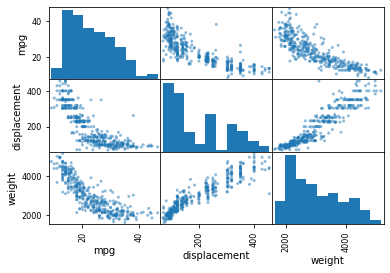

In [145]:
pd.plotting.scatter_matrix(Auto[['mpg',
                                 'displacement',
                                 'weight']])

### Numerical Summary of colums 
usign `describe()`

In [146]:
Auto[['mpg', 'weight']].describe()

,mpg,weight
count,392.000000,392.000000
mean,23.445918,2977.584184
std,7.805007,849.402560
min,9.000000,1613.000000
25%,17.000000,2225.250000
50%,22.750000,2803.500000
75%,29.000000,3614.750000
max,46.600000,5140.000000
